# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptrons

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]#petal length,petal width
y = (iris.target == 0).astype(np.int)#iris setosa

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

## Building an Image Classifier 

In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.7.0'

In [4]:
keras.__version__

'2.7.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [9]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress",
             "Coat", "Sandall", "Shirt", "Sneaker", "Bag", "Ankle Boot"]


In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.name

'dense_3'

In [17]:
model.get_layer(hidden1.name) is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[-0.05273159,  0.0002588 ,  0.01521356, ..., -0.05395296,
        -0.02876629, -0.06686178],
       [-0.03929786, -0.02736241,  0.04424196, ..., -0.02959307,
         0.01325312, -0.06991971],
       [-0.0406282 ,  0.04845403,  0.06286523, ..., -0.04086782,
         0.02331458,  0.04413432],
       ...,
       [ 0.01411702,  0.0416121 , -0.00785375, ..., -0.01441563,
         0.02046746,  0.06796736],
       [ 0.02734607, -0.02913561,  0.00838702, ...,  0.04229398,
        -0.067933  , -0.018707  ],
       [-0.0547009 , -0.06915093, -0.05868672, ...,  0.06350912,
        -0.07141565, -0.05426584]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 903us/step - loss: 0.7244 - accuracy: 0.7618 - val_loss: 0.5058 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 2s 903us/step - loss: 0.4884 - accuracy: 0.8303 - val_loss: 0.4572 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 2s 887us/step - loss: 0.4433 - accuracy: 0.8451 - val_loss: 0.4602 - val_accuracy: 0.8342
Epoch 4/30
1719/1719 [==============================] - 2s 938us/step - loss: 0.4163 - accuracy: 0.8537 - val_loss: 0.4014 - val_accuracy: 0.8554
Epoch 5/30
1719/1719 [==============================] - 2s 883us/step - loss: 0.3947 - accuracy: 0.8615 - val_loss: 0.3963 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 2s 981us/step - loss: 0.3786 - accuracy: 0.8671 - val_loss: 0.3858 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 1s 838us/step - loss: 0.3649 - accuracy: 0.8707 - val_loss: 0.3665 -

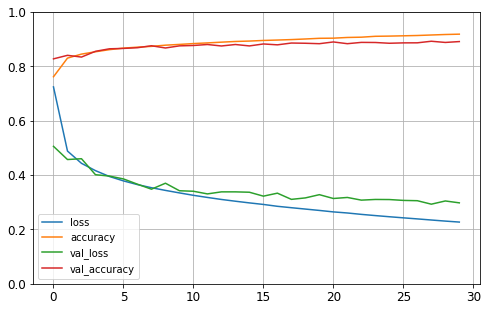

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Sets the veritcal range to [0,-1] 
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 770us/step - loss: 0.3217 - accuracy: 0.8872


[0.3217073082923889, 0.8871999979019165]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred=np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP 

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] #pretend that these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 848us/step - loss: 0.8405 - val_loss: 0.5798
Epoch 2/20
363/363 [==============================] - 0s 676us/step - loss: 0.5149 - val_loss: 0.6388
Epoch 3/20
363/363 [==============================] - 0s 705us/step - loss: 0.5212 - val_loss: 0.4852
Epoch 4/20
363/363 [==============================] - 0s 639us/step - loss: 0.4571 - val_loss: 0.4640
Epoch 5/20
363/363 [==============================] - 0s 729us/step - loss: 0.4376 - val_loss: 0.4654
Epoch 6/20
363/363 [==============================] - 0s 710us/step - loss: 0.4308 - val_loss: 0.4485
Epoch 7/20
363/363 [==============================] - 0s 797us/step - loss: 0.4215 - val_loss: 0.4434
Epoch 8/20
363/363 [==============================] - 0s 701us/step - loss: 0.4201 - val_loss: 0.4431
Epoch 9/20
363/363 [==============================] - 0s 659us/step - loss: 0.4075 - val_loss: 0.4446
Epoch 10/20
363/363 [==============================] - 0s 642us/step - loss: 0.406

## Functional API

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [34]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:,2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:,2:]

In [36]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 962us/step - loss: 1.8920 - val_loss: 0.8979
Epoch 2/20
363/363 [==============================] - 0s 732us/step - loss: 0.7695 - val_loss: 0.6933
Epoch 3/20
363/363 [==============================] - 0s 725us/step - loss: 0.6546 - val_loss: 0.6345
Epoch 4/20
363/363 [==============================] - ETA: 0s - loss: 0.612 - 0s 773us/step - loss: 0.6081 - val_loss: 0.6021
Epoch 5/20
363/363 [==============================] - 0s 706us/step - loss: 0.5786 - val_loss: 0.5807
Epoch 6/20
363/363 [==============================] - 0s 655us/step - loss: 0.5572 - val_loss: 0.5631
Epoch 7/20
363/363 [==============================] - 0s 654us/step - loss: 0.5395 - val_loss: 0.5517
Epoch 8/20
363/363 [==============================] - 0s 648us/step - loss: 0.5267 - val_loss: 0.5414
Epoch 9/20
363/363 [==============================] - 0s 683us/step - loss: 0.5167 - val_loss: 0.5327
Epoch 10/20
363/363 [==============================] - 0s 

In [37]:
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [39]:
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd")

In [40]:
history = model.fit(
[X_train_A, X_train_B],[y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B],[y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9284 - main_output_loss: 0.8219 - aux_output_loss: 1.8864 - val_loss: 0.7224 - val_main_output_loss: 0.6661 - val_aux_output_loss: 1.2291
Epoch 2/20
363/363 [==============================] - 0s 897us/step - loss: 0.5907 - main_output_loss: 0.5360 - aux_output_loss: 1.0830 - val_loss: 0.5508 - val_main_output_loss: 0.4986 - val_aux_output_loss: 1.0205
Epoch 3/20
363/363 [==============================] - 0s 879us/step - loss: 0.5178 - main_output_loss: 0.4722 - aux_output_loss: 0.9281 - val_loss: 0.5198 - val_main_output_loss: 0.4793 - val_aux_output_loss: 0.8843
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4937 - main_output_loss: 0.4573 - aux_output_loss: 0.8208 - val_loss: 0.5078 - val_main_output_loss: 0.4757 - val_aux_output_loss: 0.7963
Epoch 5/20
363/363 [==============================] - 0s 967us/step - loss: 0.4761 - main_output_loss: 0.4461 - aux_output_loss: 0.7464 - va

In [41]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - ETA: 0s - loss: 0.3798 - main_output_loss: 0.3684 - aux_output_loss: 0.48 - 0s 584us/step - loss: 0.3793 - main_output_loss: 0.3667 - aux_output_loss: 0.4929


In [42]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Subclassing API

In [43]:
class WideAndDeepModel(keras.Model):
    
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)# handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self,inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

## Saving and Restoring

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 921us/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 0s 919us/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 0s 690us/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 0s 899us/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 0s 663us/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 0s 632us/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 0s 790us/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 0s 831us/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
162/162 [==============================] - 0s 529us/step - loss: 0.4842


In [47]:
model.save("my_keras_model.h5")

In [48]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks during Training

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 0s 748us/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 0s 742us/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 0s 823us/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 0s 811us/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 0s 738us/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 0s 740us/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 0s 738us/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 0s 743us/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
162/162 [==============================] - 0s 485us/step - loss: 0.4842


In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                   validation_data=[X_valid, y_valid],
                   callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 929us/step - loss: 0.4696 - val_loss: 0.4839
Epoch 2/100
363/363 [==============================] - 0s 801us/step - loss: 0.4642 - val_loss: 0.4775
Epoch 3/100
363/363 [==============================] - 0s 787us/step - loss: 0.4595 - val_loss: 0.4728
Epoch 4/100
363/363 [==============================] - 0s 774us/step - loss: 0.4550 - val_loss: 0.4719
Epoch 5/100
363/363 [==============================] - 0s 749us/step - loss: 0.4533 - val_loss: 0.4663
Epoch 6/100
363/363 [==============================] - 0s 747us/step - loss: 0.4484 - val_loss: 0.4643
Epoch 7/100
363/363 [==============================] - 0s 750us/step - loss: 0.4457 - val_loss: 0.4614
Epoch 8/100
363/363 [==============================] - 0s 748us/step - loss: 0.4428 - val_loss: 0.4594
Epoch 9/100
363/363 [==============================] - 0s 677us/step - loss: 0.4407 - val_loss: 0.4571
Epoch 10/100
363/363 [==============================] - 0s 730us/step - l

In [53]:
class PrintTrainRatioCallBack(keras.callbacks.Callback):
    
    def __init__(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

## TensorBoard

In [54]:
root_logdir = os.path.join(os.curdir,"my_logs")

In [55]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()


In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [58]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/30
363/363 [==============================] - 0s 838us/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/30
363/363 [==============================] - 0s 909us/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/30
363/363 [==============================] - 0s 910us/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/30
363/363 [==============================] - 0s 760us/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/30
363/363 [==============================] - 0s 776us/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/30
363/363 [==============================] - 0s 836us/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/30
363/363 [==============================] - 0s 658us/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/30
363/363 [==============================] - 0s 722us/step - loss: 0.4771 - 

In [59]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1,1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is ", str(step), "Its square is" + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Hyperparameter Tuning

In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [62]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\ghafr\AppData\Local\Temp/ipykernel_19508/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [63]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0566 - val_loss: 0.7676
Epoch 2/100
363/363 [==============================] - 0s 659us/step - loss: 0.6914 - val_loss: 0.6127
Epoch 3/100
363/363 [==============================] - 0s 635us/step - loss: 0.5818 - val_loss: 0.5436
Epoch 4/100
363/363 [==============================] - 0s 651us/step - loss: 0.5167 - val_loss: 0.5164
Epoch 5/100
363/363 [==============================] - 0s 737us/step - loss: 0.4896 - val_loss: 0.4981
Epoch 6/100
363/363 [==============================] - 0s 721us/step - loss: 0.4758 - val_loss: 0.4882
Epoch 7/100
363/363 [==============================] - 0s 749us/step - loss: 0.4662 - val_loss: 0.4783
Epoch 8/100
363/363 [==============================] - 0s 768us/step - loss: 0.4583 - val_loss: 0.4724
Epoch 9/100
363/363 [==============================] - 0s 674us/step - loss: 0.4525 - val_loss: 0.4673
Epoch 10/100
363/363 [==============================] - 0s 701us/step - los

In [64]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0, 1, 2, 3],
    "n_neurons" : np.arange(1, 100),
    "learning_rate" : reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 3.1309 - val_loss: 1.5009
Epoch 2/100
242/242 [==============================] - 0s 813us/step - loss: 0.9702 - val_loss: 0.7044
Epoch 3/100
242/242 [==============================] - 0s 758us/step - loss: 0.6105 - val_loss: 0.5690
Epoch 4/100
242/242 [==============================] - 0s 769us/step - loss: 0.5412 - val_loss: 0.5437
Epoch 5/100
242/242 [==============================] - 0s 881us/step - loss: 0.5271 - val_loss: 0.5389
Epoch 6/100
242/242 [==============================] - 0s 864us/step - loss: 0.5237 - val_loss: 0.5377
Epoch 7/100
242/242 [==============================] - 0s 688us/step - loss: 0.5225 - val_loss: 0.5371
Epoch 8/100
242/242 [==============================] - 0s 834us/step - loss: 0.5216 - val_loss: 0.5369
Epoch 9/100
242/242 [==============================] - 0s 767us/step - loss: 0.5213 - val_loss: 0.5364
Epoch 10/100
242/242 [==============================] - 0s 832us/step - los

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001AEB3751D60>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AEB20B8AF0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [65]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [66]:
rnd_search_cv.best_score_

-0.32540523012479144

In [67]:
model = rnd_search_cv.best_estimator_.model

# Exercises

### 10.

In [6]:
from keras.datasets.mnist import load_data
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

(X_full, y_full), (X_test, y_test) = load_data()
#Validation set separation and Training set separation from Full set

X_valid, X_train = X_full[:5000]/255.0, X_full[5000:]/255.0
y_valid, y_train = y_full[:5000], y_full[5000:]
X_test = X_test/255.0

# print(X_full.shape)
# print(y_full.shape)
# print(X_test.shape)
# print(y_test.shape)
# print(X_valid.shape)
# print(y_valid.shape)
# print(X_train.shape)
# print(y_train.shape)

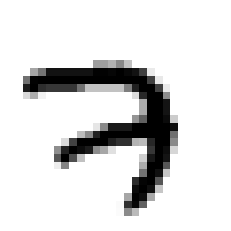

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [8]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates=[]
    self.losses=[]
  
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.learning_rate))
    self.losses.append(logs["loss"])
    K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [13]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy", 
optimizer = keras.optimizers.SGD(learning_rate=1e-3),
metrics=["accuracy"])
expo_lr = ExponentialLearningRate(factor=1.005)

In [15]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[expo_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: 160345027673849856.0000 - accuracy: 0.5943 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

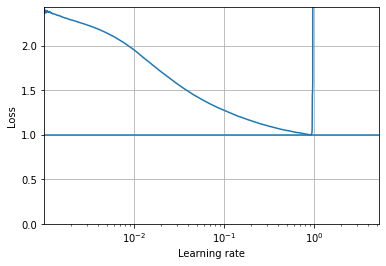

In [18]:
plt.plot(expo_lr.rates, expo_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expo_lr.losses), min(expo_lr.rates), max(expo_lr.rates))
plt.axis([min(expo_lr.rates), max(expo_lr.rates), 0, expo_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy", 
optimizer = keras.optimizers.SGD(learning_rate=3e-3),
metrics=["accuracy"])


In [33]:
run_index=1
run_logdir =os.path.join(os.curdir,"my_mnist_logs","run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 1.1159 - accuracy: 0.7337 - val_loss: 0.5211 - val_accuracy: 0.8708
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4489 - accuracy: 0.8811 - val_loss: 0.3686 - val_accuracy: 0.9002
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3625 - accuracy: 0.8985 - val_loss: 0.3171 - val_accuracy: 0.9114
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3227 - accuracy: 0.9084 - val_loss: 0.2881 - val_accuracy: 0.9204
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2964 - accuracy: 0.9150 - val_loss: 0.2683 - val_accuracy: 0.9234
Epoch 6/100
1719/1719 [==============================] - 2s 987us/step - loss: 0.2765 - accuracy: 0.9213 - val_loss: 0.2518 - val_accuracy: 0.9290
Epoch 7/100
1719/1719 [==============================] - 2s 998us/step - loss: 0.2599 - accuracy: 0.9255 - val_loss: 0.2368 - va

In [35]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 709us/step - loss: 0.0685 - accuracy: 0.9795


[0.06852058321237564, 0.9794999957084656]

In [36]:
%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.
